## 선형회귀

#### 수식적 이해

다중선형회귀는 종속변수 y에 대해 영향을 줄 것 같은 설명변수들을 선택하고 각각에 대해 독립변수 x와 가중치 w를 곱한 것을 모두 더한 형태로 표현한다.

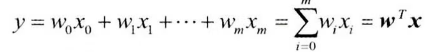

w는 가중치로, 각 x가 y에 얼마나 더 큰 영향이 있는지의 정도를 나타낸다. 

#### 다중선형회귀의 기본 가정

가정 1: 선형성(linearity)<br>
- 종속변수와 설명변수 같의 관계가 선형적이어야 한다. 

가정 2: 오차항의 평균은 0이다
- 오차항의 평균이 0이라는 것은 회귀모델이 특정 방향으로 편향되지 않았다는 것을 의미한다.
- 오차항의 평균이 양수라면 모델이 실제값에 비해 낮은 값을 예측하는 것이다.
- 오차항의 평균이 음수라면 모델이 실제값에 비해 높은 값을 예측하는 것이다.

가정 3: 독립성(independence)
- 각각의 설명변수가 서로 선형 독립적이어야 한다.
- 선형독립적이지 않으면 다중공선성이 발생하고, 설명변수들끼리 서로 연관이 있기 때문에 제대로 된 모델 학습에 문제가 된다.

가정 4: 등분산성(homoscedasticity)
- 오차항의 분산이 일정해야 한다. 즉, 오차항의 분산이 독립변수의 값에 상관없이 일정해야 한다.
- 등분산성이 성립되지 않으면 이분산성이 있다고 하고 이 경우 회귀분석의 결과가 왜곡될 수 있다.
- 횡단면 자료에서 이분산성이 많이 나타난다.
  - 횡단면 자료: 한 시점에서 여러 개체에 대한 정보를 수집한 데이터. ex)특정 연도에 대해 여러 개인의 소비 수준과 소득 수준을 조사한 자료.
  - 횡단면 자료에서 각 개체가 갖는 고유한 특성들이 다르거나 독립변수와 종속변수 간의 관계가 데이터 전체 범위에서 일정하지 않은 경우 이분산성이 나타난다.
- 등분산성은 잔차의 도표화 또는 Brown-Forsythe,Breusch-Pagan의 검정을 통해 확인할 수 있다.

가정 5: 오차항은 자기상관되어 있지 않다(non-autocorrelation)
- 오차항의 공분산은 항상 0이어야 한다. 공분산이 0이 아닐 경우 자기상관이 있다고 한다.
- 자기상관: 오차항들이 시간이나 순서에 따라 상관되어 있다는 것을 의미한다. 시계열 데이터에서 많이 나타난다.
- 자기상관이 있다: 오차항들이 독립적이지 않고 서로 상관되어 있다.
- 자기상관은 더빗-왓슨 검정이나 ACF, PACF 함수를 통해 확인할 수 있다.

가정 6: 정규성(normality)
- 오차항이 정규분포를 따른다.
- 가정 6은 위배되어도 다중선형 회귀분석의 결과에 큰 영향을 주지 않는다.
- 정규성은 샤피로-윌크 검정, 자퀴-베라 검정, Q-Q plot을 통해 확인할 수 있다.

#### 회귀분석 평가방법

시각화
- 회귀선이 데이터들의 산점도와 비슷한 추세로 증가한다면 회귀선이 데이터 전반을 잘 요약한다고 할 수 있다.
- 그러나 두 집단에 대해서 어느 회귀선이 해당 데이터를 더 잘 요약하는지 객관적으로 비교하기에는 어렵다.
- 두 집단에 대해 객관적으로 비교하기 위해서는 통계지표를 활용한다.

통계지표
- R^2
  - 결정계수의 약어로, 회귀분석에서 모델이 설명하는 데이터의 총 변동 중에서 설명된 비율을 나타낸다.
  - 0과 1사이의 값으로, 1에 가까워질수록 모델이 데이터를 잘 설명한다는 것을 의미한다.
  - R^2 값이 0.71인 경우 해당 모델이 데이터에 대해서 71%의 설명력이 있다고 해석한다.
- 조정된 R^2
  - R^2값은 독립변수의 개수가 증가할수록 값이 커지는 경향이 있으므로 데이터와 큰 관련성이 없는 변수를 추가해도 R^2 값은 높아진다.
  - 조정된 R^2은 기존의 R^2을 변수의 개수 증가에 대해 덜 민감하도록 조정한 것이다.
  - n이 샘플 크기이고 k가 설명 변수의 개수일때, 기존의 R^2 식에 (n-1/n-k)를 곱하여 조정된 R^2를 표현한다.
- AIC, BIC(SC)
  - AIC와 BIC는 정보기준이라고도 불리며, 값이 낮을수록 좋다고 평가한다.
  - AIC(Akaike information criterion): BIC에 비해 복잡성에 대한 패널티가 비교적 작다.
  - BIC(Bayesian information criterion)(SC, Schwarz Criterion): AIC보다 엄격한 기준으로, 데이터의 양에 따라 더 강한 패널티를 부과한다.
  - AIC는 모델의 설명력과 복잡성을 균형있게 고려하며, 비교적 덜 엄격한 패널티를 부과해서 설명력이 더 높은 모델을 선택한다. 반면에 BIC는 설명력보다는 단순성을 더 중시한다. 

## 비선형회귀

데이터셋의 분포가 선형적이지 않을 경우, y=ax+b의 선형 회귀선으로는 데이터의 분포를 설명할 수 없는 경우, 비선형회귀를 사용한다. 

#### 다항식 회귀모델

선형 모델의 feature를 다항식으로 만들어 선형 회귀를 사용한다. <br>
기존의 선형회귀 코드에서 변수들을 다항식으로 만들고 scikit-learn의 LinearRegression 클래스를 똑같이 이용한다. <br>
선형 모델에 비해 회귀선을 잘 fit하도록 그릴 수 있다는 장점이 있지만, 너무 많은 feature를 이용하면 결과가 overfitting 될 수 있다. 따라서 overfitting을 방지하기 위해 릿지, 라쏘 규제를 이용할 수 있다.

#### 지수/로그 회귀모델

데이터의 증감 형태가 지수/로그 형태인 경우 지수/로그 회귀모델을 사용한다.<br>
다항식 회귀모델의 경우처럼 기존 선형회귀식에 지수/로그를 사용해 변형시키고 선형회귀를 사용한다.